**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer

**Load the dataset**

In [2]:
# Assuming the dataset is in a CSV file named 'PlayTennis.csv'
df = pd.read_csv('PlayTennis.csv')

**Dataset Visualization**

In [3]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
df.shape

(14, 5)

**EDA**

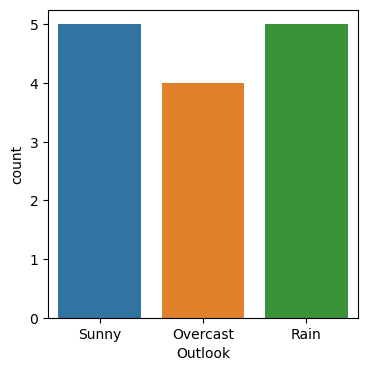

In [5]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Outlook'])
plt.show()

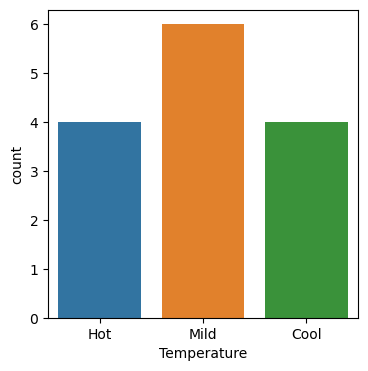

In [6]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Temperature'])
plt.show()

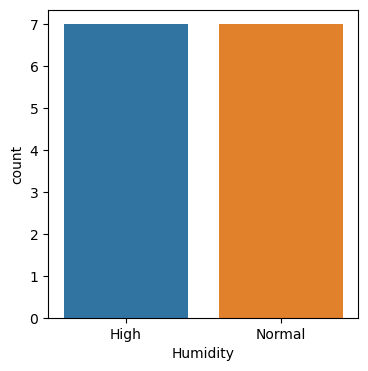

In [7]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Humidity'])
plt.show()

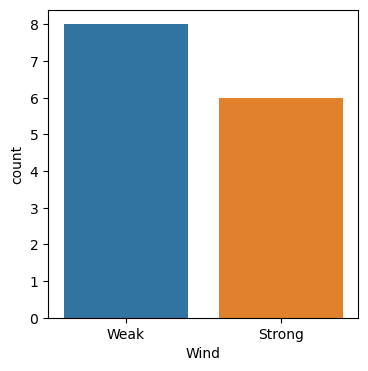

In [8]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Wind'])
plt.show()

**Feature Extraction**

In [9]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column 'PlayTennis'

**Use LabelEncoder for all the categorical variables**

In [10]:
label_encoder = LabelEncoder()

# Label encode features (X)
X_encoded = X.copy()
for column in X.columns:
    if X[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X[column])
        
# Label encode target variable (y)
y_encoded = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

**Create a Random Forest classifier**

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=50)

**Fit the model to the training data**

In [13]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

**Make predictions on the test set**

In [14]:
y_pred = rf_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

RF Accuracy: 0.6666666666666666
RF Confusion Matrix:
[[1 0]
 [1 1]]
RF Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



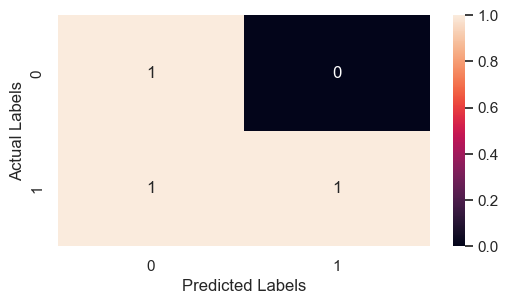

In [16]:
print(f'RF Accuracy: {accuracy}')
print(f'RF Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'RF Classification Report:\n{classification_report_str}')

**Predict whether a person will play tennis or not**

In [17]:
# Assuming we have a new set of feature values for prediction
new_data = pd.DataFrame({'Outlook': ['Sunny'], 'Temperature': ['Hot'], 'Humidity': ['High'], 'Wind': ['Weak']})

# Encode categorical variables using the same LabelEncoder
new_data_encoded = new_data.copy()  # Make a copy to avoid modifying original data
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        # Fit label encoder on the training data and transform new data
        new_data_encoded[column] = label_encoder.fit_transform(new_data[column])

# Use the trained DT model to make predictions
predicted_play_tennis = rf_classifier.predict(new_data_encoded)

# Print the predicted outcome
if predicted_play_tennis[0] == 1:
    print("The person is predicted to play tennis.")
else:
    print("The person is predicted not to play tennis.")

The person is predicted to play tennis.
